In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('/content/train.csv')

In [16]:
df=pd.read_csv('train.csv')

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
#from tensorflow.keras import *
#from tensorflow.keras.utils import to_categorical
#to_categorical(df['Dependents'])

# PREPROCESSING

# Filling nulls

In [19]:
# missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
missing_values = df.isnull()
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_without_missing_values = df.dropna()
columns_with_missing_values = df.loc[:, df.isnull().any()]
columns_without_missing_values = df.loc[:, df.notnull().all()]

In [21]:
df.fillna(method='ffill',axis=1).isnull().sum()

df1=df.fillna(method='ffill',axis=1)

## Filling nulls: 1

In [22]:
# EX:
mode_gender=df['Gender'].value_counts().index[0]
mode_gender

'Male'

In [23]:
for item in df.columns:
    # Replacing mode in every column for null cells
    temp=df[item].value_counts().index[0]
    df[item].fillna(temp,inplace=True)

## Filling nulls: 2

In [24]:
gender_without_null=[]
for item in df['Gender']:
    if item==np.nan:
        gender_without_null.append(mode_gender)
    else:
        gender_without_null.append(item)

df['Gender']=gender_without_null

## Filling nulls: 3

In [25]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [26]:
temp=[]
for item in df['Loan_Status']:
  if item=='Y':
    temp.append(1)
  else:
    temp.append(0)

df['Loan_Status']=temp

In [27]:
df.drop(columns='Loan_ID',inplace=True)

In [28]:
# for item in df.columns:
#     # Replacing mode in every column for null cells Based on Y or N
#     temp=df[item][چالشششششششششش].value_counts().index[0]
#     df[item].fillna(temp,inplace=True)

In [29]:
pd.get_dummies(df).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [30]:
df['Gender'].isnull().sum()

0

In [31]:
df2=pd.get_dummies(df)
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,...,False,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,1,False,True,False,True,...,False,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,1,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,1,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True


# ONE HOT

In [32]:
pd.get_dummies(df['Gender'])

,Female,Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
609,True,False
610,False,True
611,False,True
612,False,True


In [33]:
# Drop
df2.drop(columns=['Gender_Male','Married_No','Education_Not Graduate','Self_Employed_No'])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,1,False,False,True,False,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,True,False,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,False,True,True,False,False,False,True,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,False,True,True,False,False,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,False,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,False,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,1,False,True,False,False,False,True,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,1,False,True,False,True,False,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,1,False,True,False,False,True,False,True,False,False,False,True


In [34]:
df2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [35]:
# df.drop(columns=['Loan_ID','Dependents','Loan_Status'''])

In [36]:
# df2 = pd.get_dummies(df)

# # Loan_ID causes Problems in number of columns in get_dummies
# df2.columns

In [37]:
# missing values
df2.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [38]:
df2 = pd.get_dummies(df)

df2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [39]:
# We have problems in 3+ Class in Dependents column. We must solve it!

In [40]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [41]:
# Replacing 100 except for 3+ till we can work with to_categorical in tensorflow.keras.utils package

New_Dependents_Column = []

for item in df['Dependents']:
    if item=='3+':
        New_Dependents_Column.append(100)
    else:
        New_Dependents_Column.append(item)

New_Dependents_Column

['0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 100,
 '2',
 '1',
 '2',
 '2',
 '2',
 '0',
 '2',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '2',
 '1',
 '0',
 '0',
 '2',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 100,
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '1',
 '2',
 '0',
 '0',
 '1',
 '2',
 '0',
 100,
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 100,
 '0',
 '0',
 '2',
 '0',
 100,
 100,
 '0',
 '0',
 '1',
 100,
 100,
 '0',
 '1',
 '2',
 '0',
 '1',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '2',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '2',
 100,
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 100,
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 100,
 '0',
 '2',
 '0',
 '2',
 '2',
 '0',
 '0',
 '0',
 '2',
 '0',
 '2',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 100,
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0'

In [42]:
df['Dependents'] = New_Dependents_Column

In [43]:
df['Dependents'].value_counts()

Dependents
0      360
1      102
2      101
100     51
Name: count, dtype: int64

In [44]:
df2 = pd.get_dummies(df)

df2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_100',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [45]:
# We must delete binary get_dummies classifications for avoiding of Repetition!

df2.drop(columns=['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No'],inplace=True)

In [46]:
df2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_100', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [47]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_100,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,1,True,False,False,True,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,False,True,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,False,True,False,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,True,False,False,True,False,False,False,True


In [48]:
# Checking imbalanced Classes
# up to 80/20 (x4) is imbalanced and 60/40 (x2) is slightly imbalanced

In [49]:
# Is imbalanced

df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

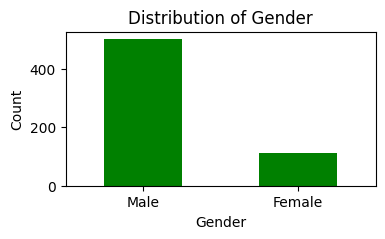

In [50]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4, 2))
gender_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [51]:
# Is slightly imbalanced

df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

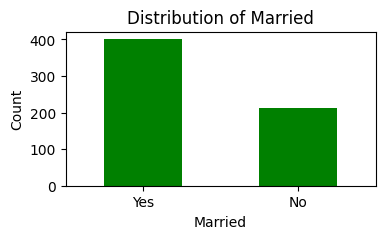

In [52]:
Married_counts = df['Married'].value_counts()

plt.figure(figsize=(4, 2))
Married_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Distribution of Married')
plt.show()

In [53]:
# Is imbalanced

df['Dependents'].value_counts()

Dependents
0      360
1      102
2      101
100     51
Name: count, dtype: int64

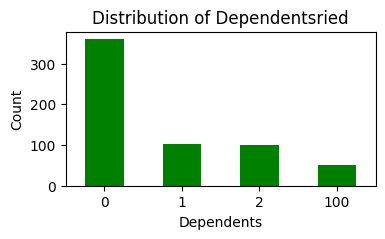

In [54]:
Dependents_counts = df['Dependents'].value_counts()

plt.figure(figsize=(4, 2))
Dependents_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Distribution of Dependentsried')
plt.show()

In [55]:
# Is slightly imbalanced

df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

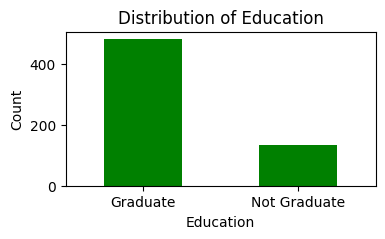

In [56]:
Education_counts = df['Education'].value_counts()

plt.figure(figsize=(4, 2))
Education_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

In [57]:
# Is imbalanced

df['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

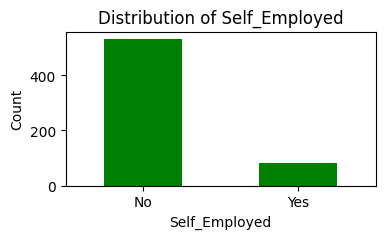

In [78]:
Self_Employed_counts = df['Self_Employed'].value_counts()

plt.figure(figsize=(4, 2))
Self_Employed_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Distribution of Self_Employed')
plt.show()

In [59]:
# Is not imbalanced

df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

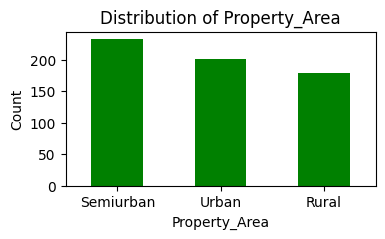

In [80]:
Property_Area_counts = df['Property_Area'].value_counts()

plt.figure(figsize=(4, 2))
Property_Area_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.title('Distribution of Property_Area')
plt.show()

In [61]:
# Is slightly imbalanced

df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

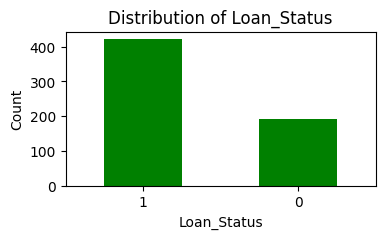

In [81]:
Loan_Status_counts = df['Loan_Status'].value_counts()

plt.figure(figsize=(4, 2))
Loan_Status_counts.plot(kind='bar', rot=0, color = 'g')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Distribution of Loan_Status')
plt.show()

In [63]:
from sklearn import preprocessing

In [64]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_100,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,1,True,False,False,True,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,True,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,True,True,False,True,False,False,True,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,True,True,False,True,False,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,True,False,False,True,False,False,True,False,False,False,True


In [65]:
# Credit_History is just 0 & 1 and it does not need any scaling

df2['Credit_History'].describe()

count    614.000000
mean       0.855049
std        0.352339
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [66]:
#Columns_for_standardization = X

X = df2.drop(columns=['Loan_Status'])
y = df2['Loan_Status']

# Scaling

In [67]:
# Scaling

for column in X.columns:
  data_scaled = preprocessing.scale(df2[column])
  df2[column] = data_scaled

df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_100,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,-0.302759,0.273231,0.411733,1,0.472343,-1.372089,-0.300975,0.839974,-0.446339,-0.443713,0.528362,-0.392601,-0.641478,-0.782016,1.428147
1,-0.134412,-0.038732,-0.207648,0.273231,0.411733,0,0.472343,0.728816,-0.300975,-1.190514,2.240448,-0.443713,0.528362,-0.392601,1.558899,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.944757,0.273231,0.411733,1,0.472343,0.728816,-0.300975,0.839974,-0.446339,-0.443713,0.528362,2.547117,-0.641478,-0.782016,1.428147
3,-0.462062,0.251980,-0.302759,0.273231,0.411733,1,0.472343,0.728816,-0.300975,0.839974,-0.446339,-0.443713,-1.892641,-0.392601,-0.641478,-0.782016,1.428147
4,0.097728,-0.554487,-0.053093,0.273231,0.411733,1,0.472343,-1.372089,-0.300975,0.839974,-0.446339,-0.443713,0.528362,-0.392601,-0.641478,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.885313,0.273231,0.411733,1,-2.117107,-1.372089,-0.300975,0.839974,-0.446339,-0.443713,0.528362,-0.392601,1.558899,-0.782016,-0.700208
610,-0.212557,-0.554487,-1.253868,-2.522836,0.411733,1,0.472343,0.728816,3.322532,-1.190514,-0.446339,-0.443713,0.528362,-0.392601,1.558899,-0.782016,-0.700208
611,0.437174,-0.472404,1.278459,0.273231,0.411733,1,0.472343,0.728816,-0.300975,-1.190514,2.240448,-0.443713,0.528362,-0.392601,-0.641478,-0.782016,1.428147
612,0.357064,-0.554487,0.493794,0.273231,0.411733,1,0.472343,0.728816,-0.300975,-1.190514,-0.446339,2.253710,0.528362,-0.392601,-0.641478,-0.782016,1.428147


# Standardization

In [68]:
# Standardization (Mean = 0, Var = 1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.07299082, -0.55448733, -0.30275919, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.03873155, -0.20764834, ...,  1.55889948,
        -0.7820157 , -0.70020801],
       [-0.39374734, -0.55448733, -0.94475737, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.43717437, -0.47240418,  1.27845856, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [ 0.35706382, -0.55448733,  0.49379411, ..., -0.64147818,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.55448733, -0.14820407, ..., -0.64147818,
         1.2787467 , -0.70020801]])

# Normalization

In [69]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.07048856, 0.        , 0.16063676, ..., 0.        , 0.        ,
        1.        ],
       [0.05482993, 0.03619171, 0.17221418, ..., 1.        , 0.        ,
        0.        ],
       [0.03525046, 0.        , 0.08248915, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.09798392, 0.00575995, 0.35311143, ..., 0.        , 0.        ,
        1.        ],
       [0.09193568, 0.        , 0.25759768, ..., 0.        , 0.        ,
        1.        ],
       [0.05482993, 0.        , 0.17945007, ..., 0.        , 1.        ,
        0.        ]])

In [119]:
pip install lazyprediction

ERROR: Could not find a version that satisfies the requirement lazyprediction (from versions: none)
ERROR: No matching distribution found for lazyprediction


In [ ]:
# lazyprediction

from lazypredict.Supervised import LazyClassifier

ModuleNotFoundError: No module named 'lazypredict'

In [70]:
# Train Test Split


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (491, 16)
X_test shape: (123, 16)
y_train shape: (491,)
y_test shape: (123,)


In [71]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

NameError: name 'LazyClassifier' is not defined

In [ ]:
# Selecting GaussianNB for modeling

from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
model = gnb.fit(X_train , y_train)

In [ ]:
preds = gnb.predict(X_test)

preds

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


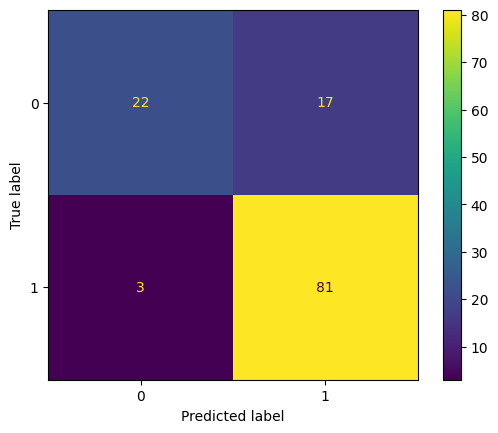

In [ ]:
# Plotting

predicted = tf.squeeze(preds)
predicted = np.array([1 if x >= 0.5 else 0 for x in preds])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
# metrics

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)

accuracy

0.8373983739837398

In [ ]:
# metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, preds, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.56      0.69        39
           1       0.83      0.96      0.89        84

    accuracy                           0.84       123
   macro avg       0.85      0.76      0.79       123
weighted avg       0.84      0.84      0.83       123



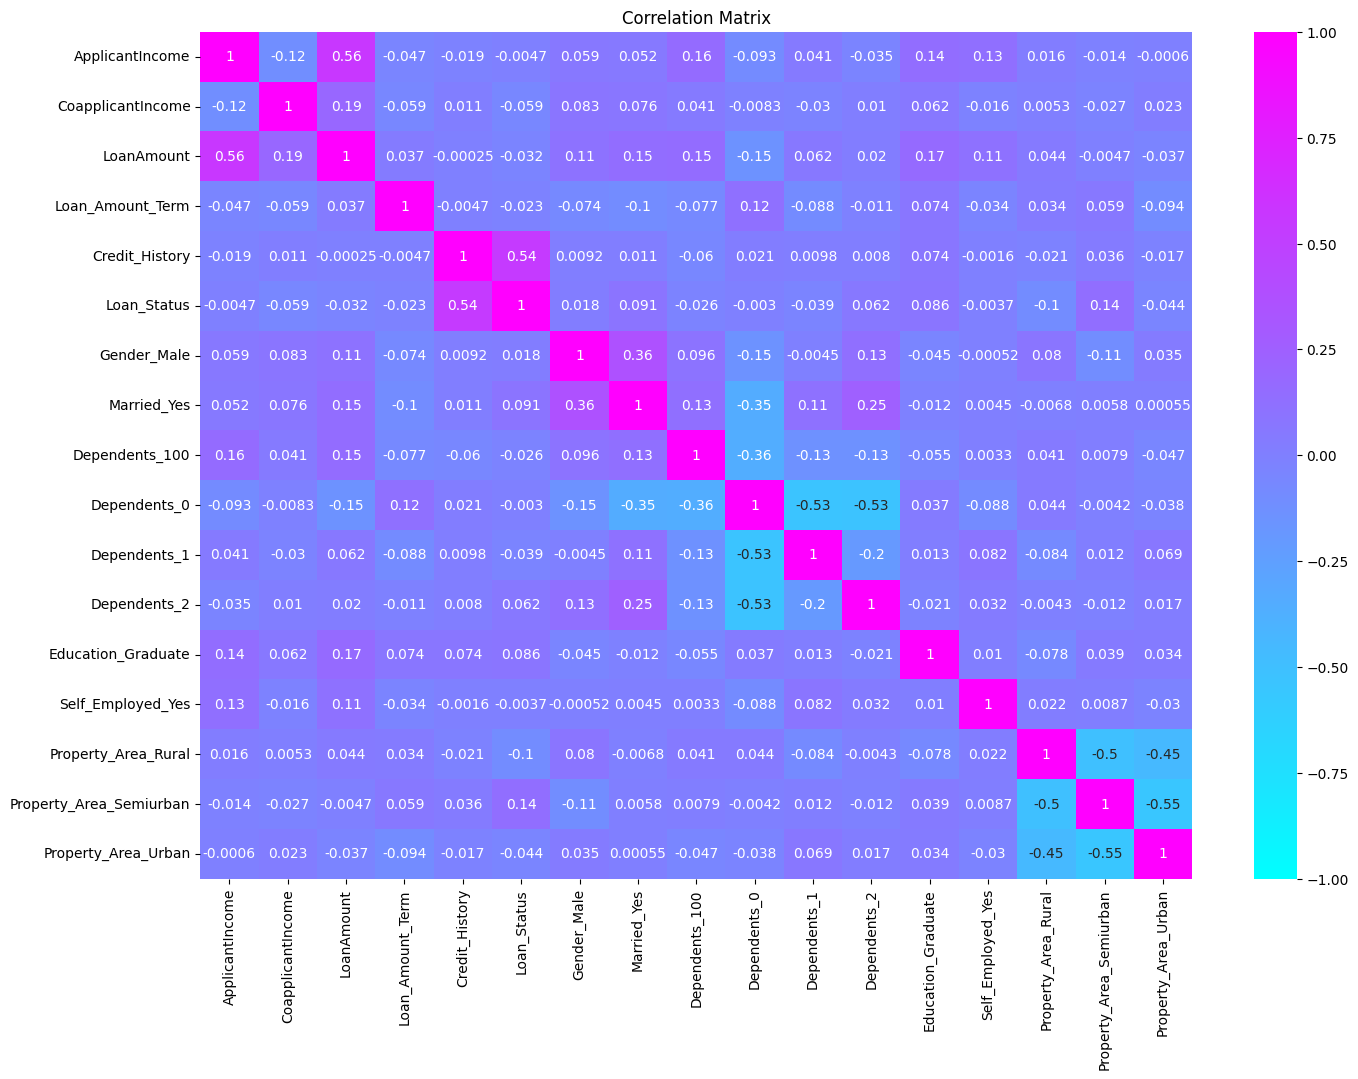

In [77]:
corr_matrix = df2.corr()

plt.figure(figsize=(16, 11))
sns.heatmap(corr_matrix, annot=True, cmap='cool', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()